# Import Libraries & Data

In [2]:
# Data Analysis
import numpy as np
import pandas as pd
import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Misc.
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from collections import Counter
import category_encoders as ce

In [3]:
# Import Data
data = pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")

In [4]:
import warnings
warnings.filterwarnings('ignore')

# EDA #

Before splitting the data into the test set and training set, it is important to deal with the disproportionate number of No Failure's when compared to the number of failures. If we do not do this, the model will have very low precision on failure items.

In [5]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


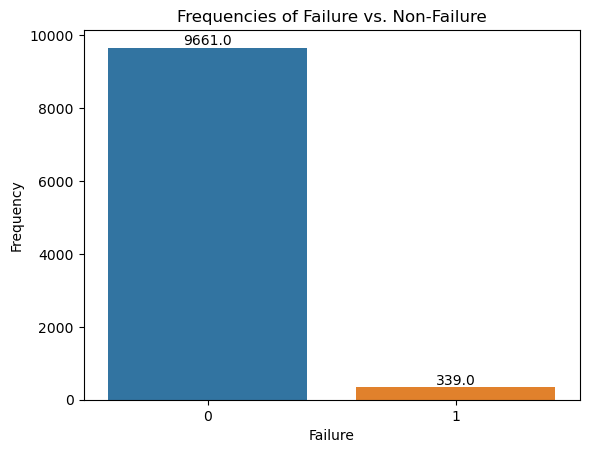

In [8]:
# Create a bar graph of No. of Failures vs Non-Failures
sns.countplot(x='Target', data=data)
plt.xlabel('Failure')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure vs. Non-Failure')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

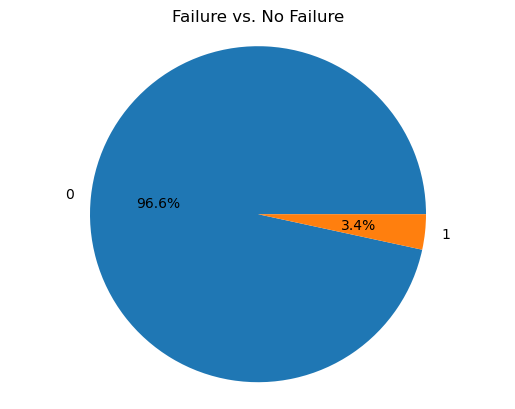

In [9]:
# Create a pie chart of Failures vs No Failures
category_counts = data['Target'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Failure vs. No Failure')
plt.show()

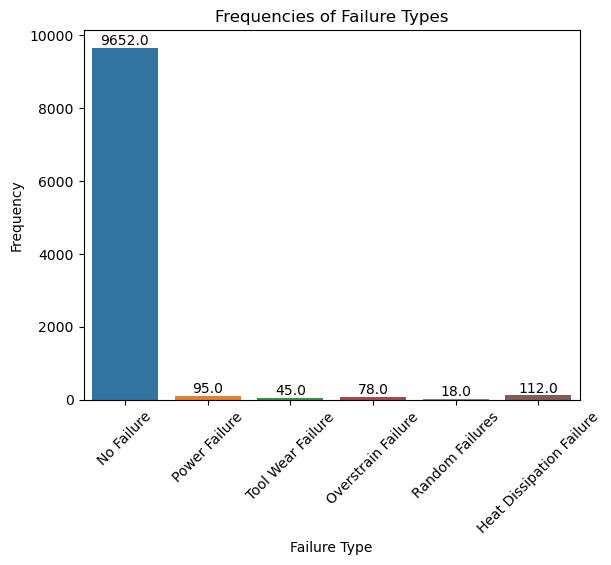

In [10]:
sns.countplot(x='Failure Type', data=data)
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

In [11]:
# Drop ID & UID since they provide no information
data.drop(data.columns[0:2], axis=1, inplace=True)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


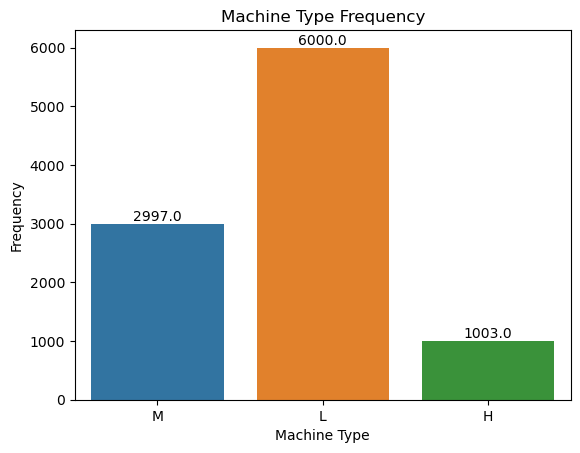

In [12]:
# Create Bar Graph of Machine Type Frequency
sns.countplot(x='Type', data=data)
plt.xlabel('Machine Type')
plt.ylabel('Frequency')
plt.title('Machine Type Frequency')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

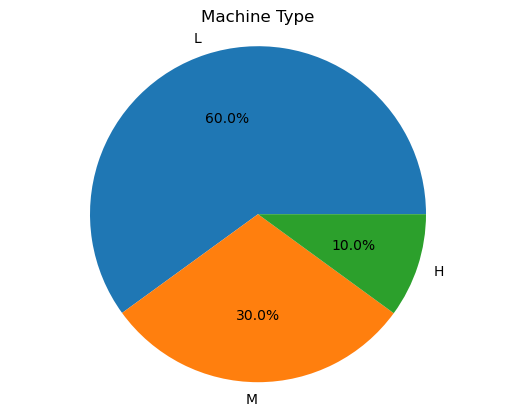

In [13]:
# Create Pie Chart of Machine Type Frequency
category_counts = data['Type'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Machine Type')
plt.show()

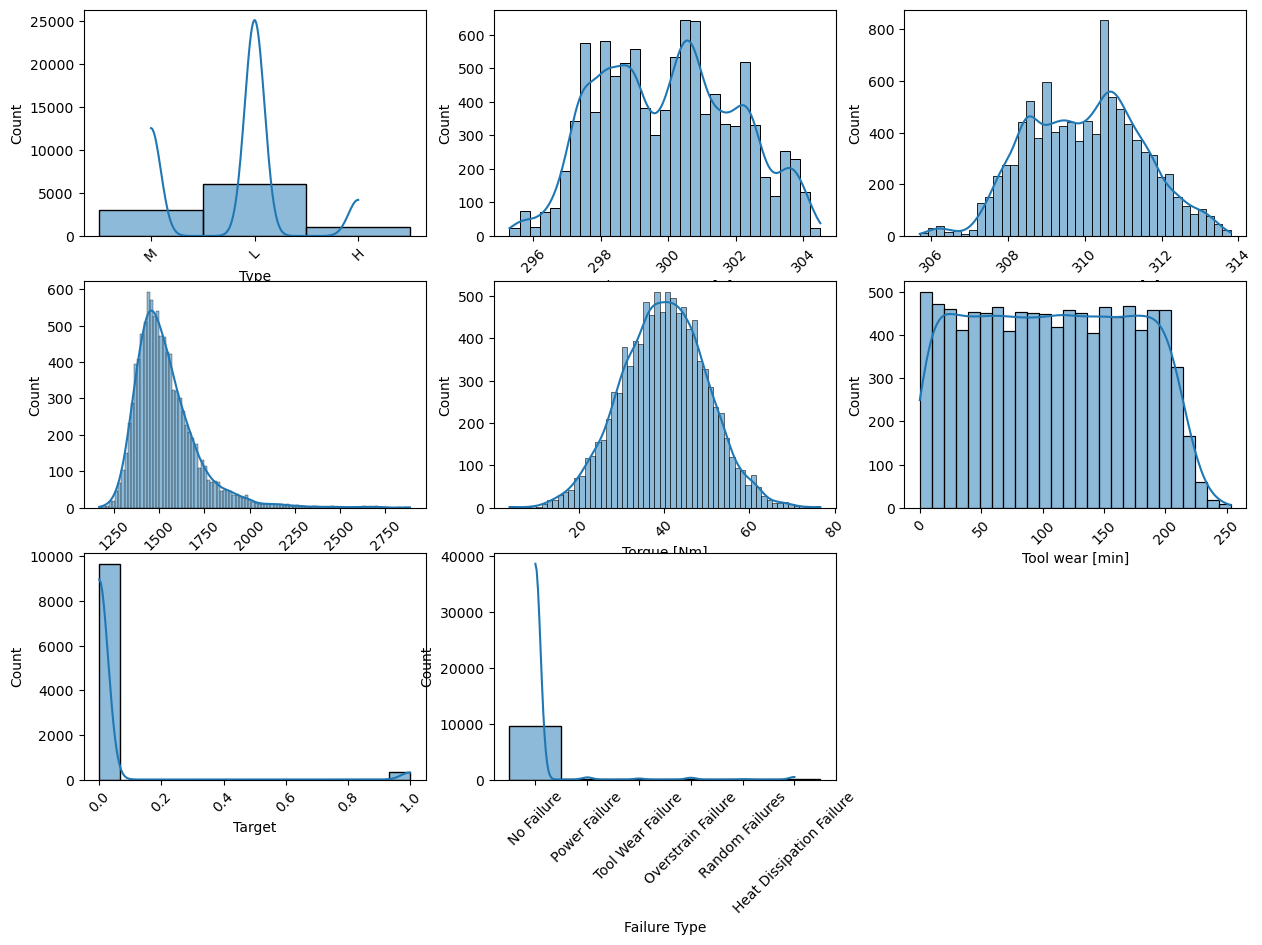

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data[col],kde=True)
    plt.xticks(rotation=45)

**In order to address the imbalanced data, I will use SMOTE to create new failure data types.**

In [15]:
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
data = encoder.fit_transform(data)

In [16]:
encode=LabelEncoder()
data.loc[:,data.columns[-1]]=encode.fit_transform(data.loc[:,data.columns[-1]])
encode.classes_

array([1, 2, 3, 4, 5, 6])

In [17]:
X = data.drop(columns="Failure Type" , axis=1)
y = data["Failure Type"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
data = pd.get_dummies(data,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
X_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
9953,2,298.1,307.8,1565,35.3,119,0
3850,1,302.3,311.0,1421,41.3,182,0
4962,1,304.0,312.7,1456,51.2,160,0
3886,2,302.4,311.3,1392,50.5,51,0
5437,1,302.9,312.6,1394,46.4,82,0


In [19]:
data_train = data.drop(data.columns[-3], axis=1)
data_train_val = data_train.values
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(data_train_val,y)
X_res.shape,y_res.shape

((57902, 7), (57902,))

In [20]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({0: 9652, 5: 112, 1: 95, 3: 78, 2: 45, 4: 18})
Resampled Dataset Shape Counter({3: 9652, 4: 9652, 5: 9652, 2: 9651, 1: 9648, 0: 9647})


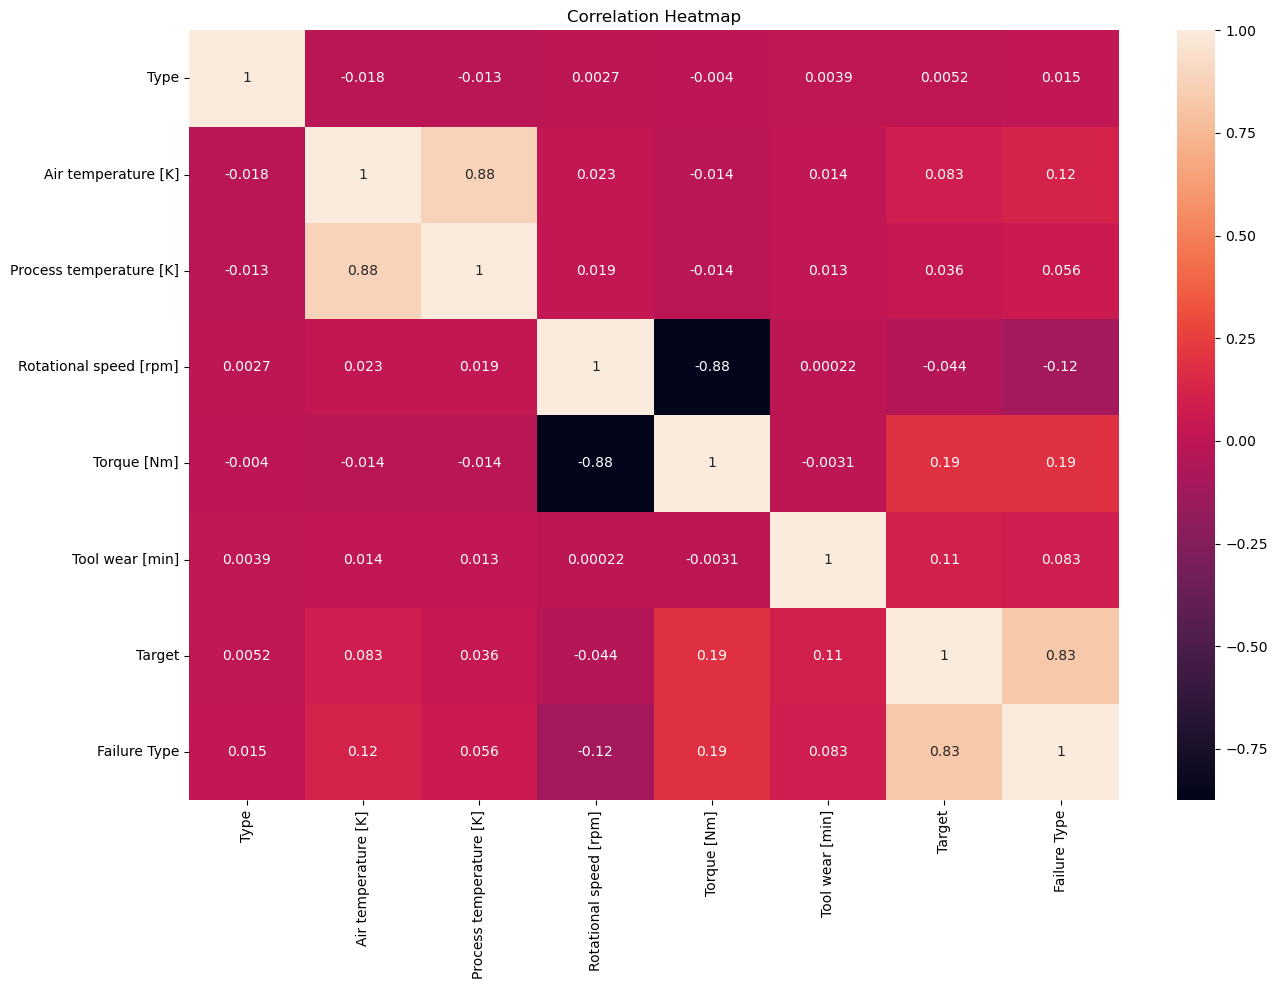

In [21]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data=data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.71 %
Model Accuracy Score : 97.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1933
           1       0.89      0.36      0.52        22
           2       0.00      0.00      0.00         7
           3       0.83      0.36      0.50        14
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        19

    accuracy                           0.97      2000
   macro avg       0.45      0.29      0.33      2000
weighted avg       0.96      0.97      0.96      2000

--------------------------------------------------------


In [23]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 96.52 %
Model Accuracy Score : 96.65 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1933
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        19

    accuracy                           0.97      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.93      0.97      0.95      2000

--------------------------------------------------------


In [24]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.65 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1933
           1       0.95      0.95      0.95        22
           2       1.00      1.00      1.00         7
           3       0.93      0.93      0.93        14
           4       0.00      0.00      0.00         5
           5       1.00      1.00      1.00        19

    accuracy                           1.00      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.99      1.00      1.00      2000

--------------------------------------------------------


**At first glance, it may seem like there is only a 2% difference between random forest & logistic regression however, random forest also has much higher precision at predicting the type of error when compared to logistic regression.**